# UNEMPLOYMENT ANALYSIS WITH PYTHON
Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project. 

# Importing Necessary Libraries 

In [43]:
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl
import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [2]:
df = pd.read_csv("C:/Users/Devi/Downloads/Unemployment in India.csv")

In [3]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Removing spaces before and after the column names
df.columns = df.columns.str.strip()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning The Data

In [5]:
# Checking for null values
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [6]:
# Removing the null values in the dataset
df = df.dropna()
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


# Analyzing The Data

In [7]:
# Checking the shape of the dataset
df.shape

(740, 7)

In [8]:
# Checking the size of the dataset
df.size

5180

In [9]:
# Getting the columns alone
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [10]:
# Checking the data types of the dataset
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [11]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [12]:
# Checking for duplicate records in the dataset
df.duplicated().sum()

0

In [13]:
# Checking for null values
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [14]:
# Descriptive statistical analysis of data
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [15]:
# Counting the values of regions
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [16]:
# Counting the values of dates
df['Date'].value_counts()

Date
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name: count, dtype: int64

In [17]:
# Counting the values of areas
df['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [18]:
df['Frequency'].value_counts()

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [19]:
# Adding Day, Month, and Year
df[["day", "month", "year"]] = df['Date'].str.split("-", expand = True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,day,month,year
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31,05,2019
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,30,06,2019
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,31,07,2019
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,31,08,2019
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,30,09,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,29,02,2020
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,31,03,2020
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,30,04,2020
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,31,05,2020


# Visualizing The Data

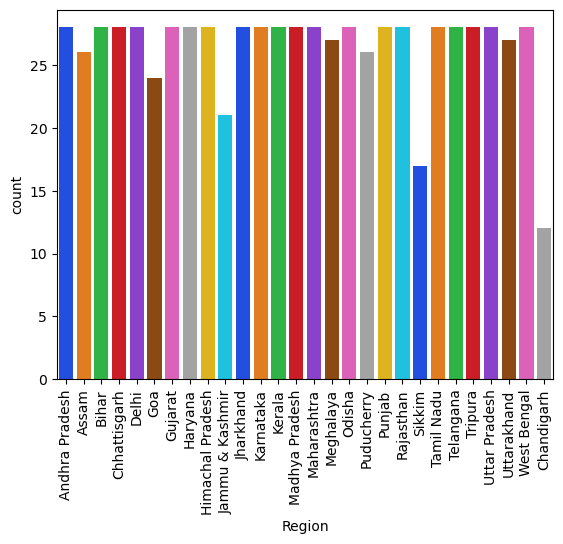

In [20]:
# Count Plot of the regions
sns.countplot(x = df['Region'], palette = "bright")
plt.xticks(rotation ='vertical')
plt.show()

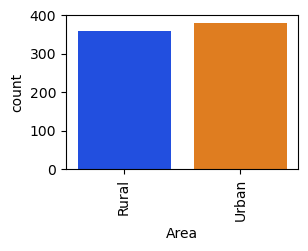

In [21]:
# Count Plot of the Areas
plt.figure(figsize = (3, 2))
sns.countplot(x = df['Area'],palette = "bright")
plt.xticks(rotation='vertical')
plt.show()

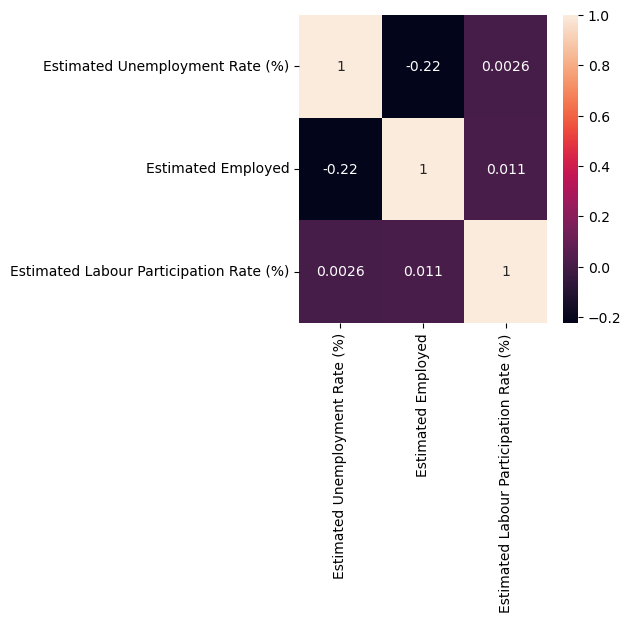

In [22]:
# Heatmap of Estimated Unemployement Rate, Estimated Employed, and Estimated Labour PArticipation Rate
plt.figure(figsize = (4,4))
sns.heatmap(df[['Estimated Unemployment Rate (%)',
                'Estimated Employed',
                'Estimated Labour Participation Rate (%)']].corr(),annot=True)
plt.show()

# 

Heatmap gives me correlation matrix in grapical format.It also gives us correlation between each independent feature. From the above visualisation we can say that,Estimated Labour Participation Rate,latitude having highly positive correlated feat i.e 40% and estimated employed,estimated unemployment rate is highly negative correlated feat. They may play very importtant role in the analysis.

when the independent and dependent feat are correlated with each other then it can be say that they will perform better while training model but when independent are highly correlerated with independent feat it may act as duplicate,so insted of use them in training we must remove them forever for better performance of model.this is the part of feature selection.

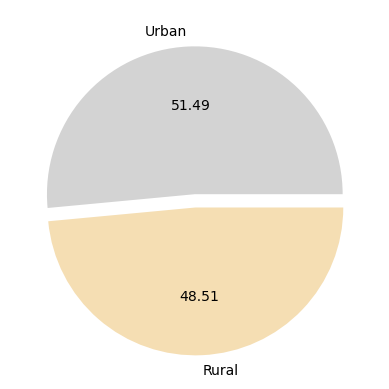

In [24]:
# Pie Chart of the Area (Rural and Urban)
plt.pie(x = df['Area'].value_counts(), autopct = '%0.2f', explode = [0,0.09], colors = [ '#d3d3d3','#f5deb3'], labels = ['Urban', 'Rural'])
plt.show()

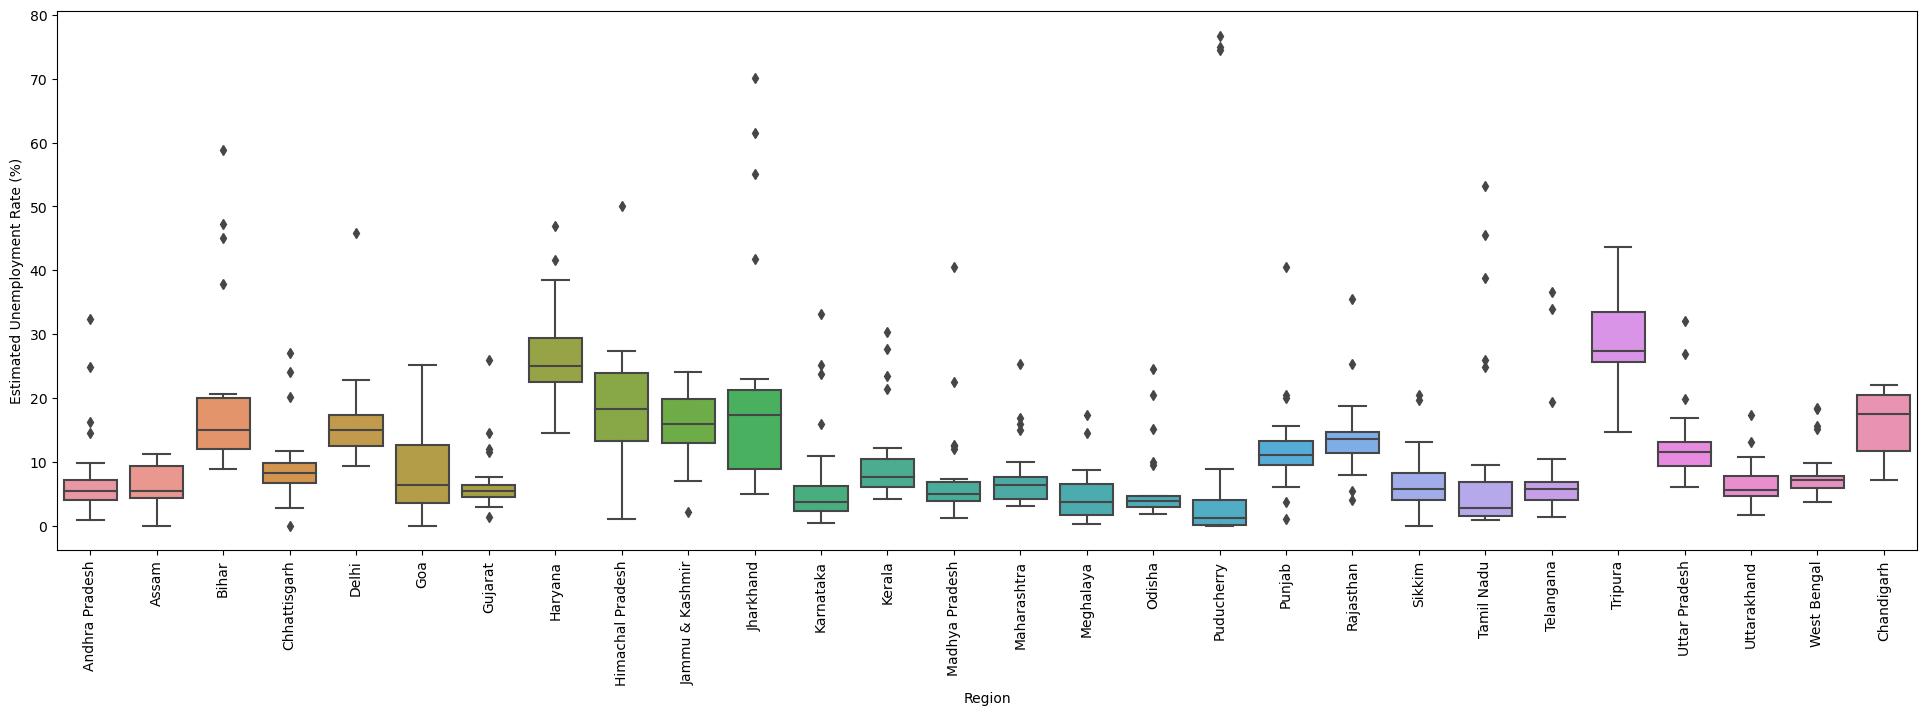

In [25]:
# Box Plot of Estimated Unemployment Rate
plt.figure(figsize=(24, 7))
sns.boxplot(x = 'Region', y= 'Estimated Unemployment Rate (%)', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

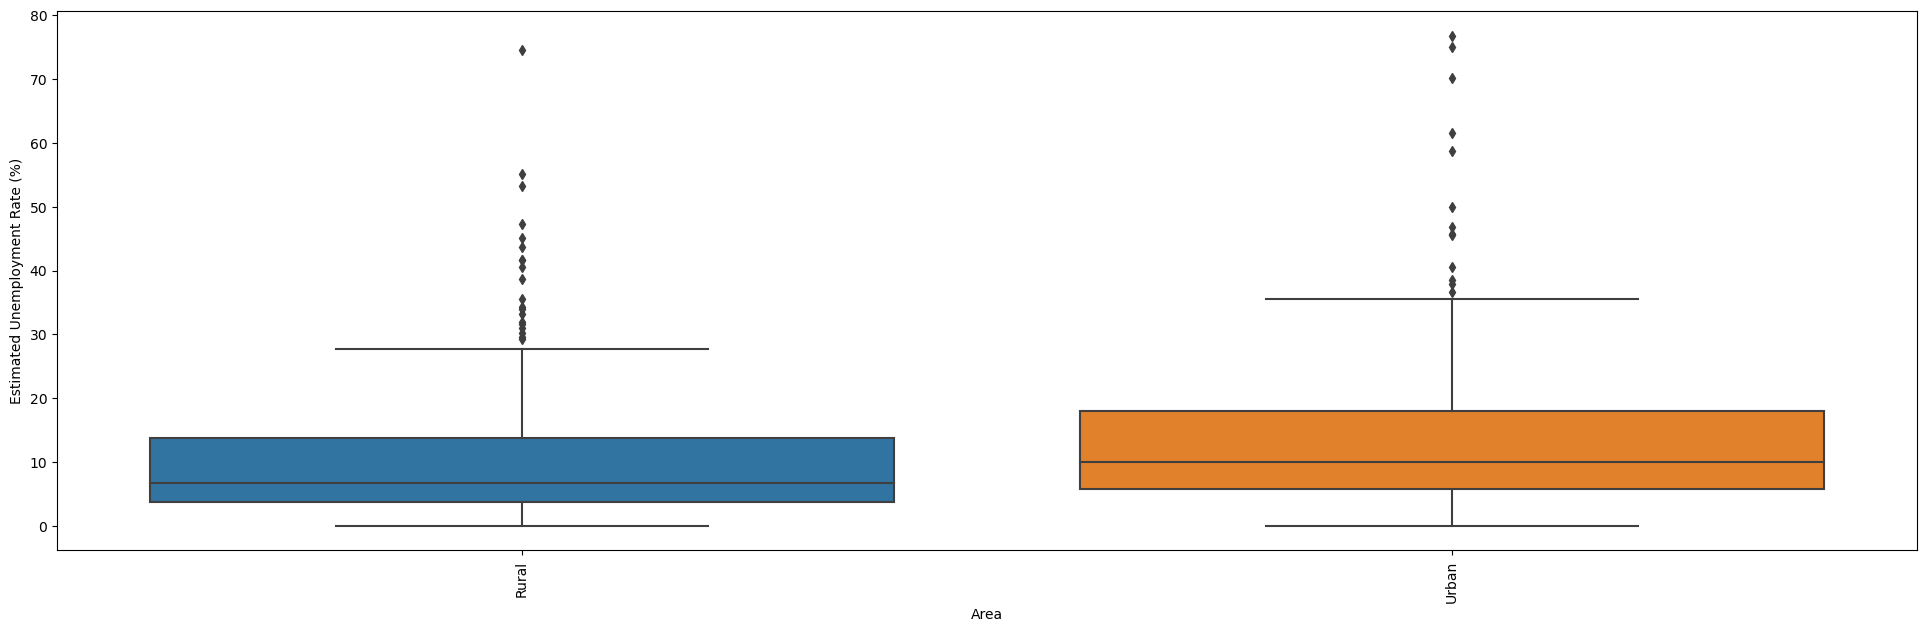

In [26]:
# Box Plot of Estimated Unemployment Rate
plt.figure(figsize=(24, 7))
sns.boxplot(x = 'Area', y= 'Estimated Unemployment Rate (%)', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

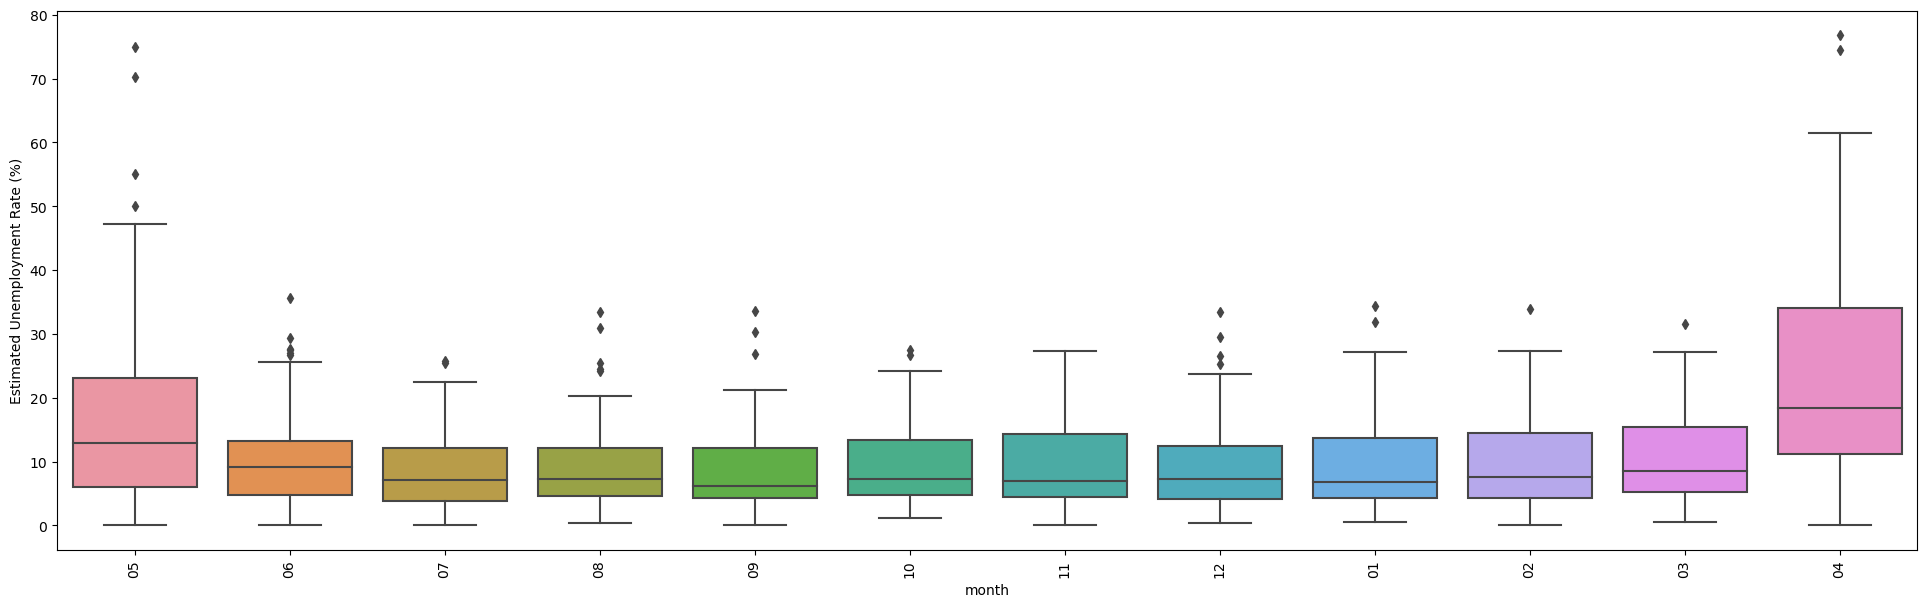

In [27]:
# Box Plot of Estimated Unemployment Rate
plt.figure(figsize=(24, 7))
sns.boxplot(x = 'month', y= 'Estimated Unemployment Rate (%)', data = df)
plt.xticks(rotation = 'vertical')
plt.show()

In [28]:
# Bar Plot of Average Estimated Unployment Rate
fig = pl.bar(df, x = 'Region', y = "Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

In [29]:
# Bar Plot of Estimated Employed people in every month
fig = pl.bar(df, x = 'month', y = 'Estimated Employed', color = 'month', title = 'Estimated Employed People')
fig.show()

In [30]:
# Scatter Plot of Estimated Employed in animation
pl.scatter(data_frame = df, x = 'Estimated Employed', y = 'Region',animation_frame = 'month')

In [31]:
# Scatter Plot of Estimated Unemployment Rate in animation
pl.scatter(data_frame = df, x = 'Estimated Unemployment Rate (%)', y = 'Region', animation_frame = 'month')

In [32]:
# Scatter Plot of Estimated Labour Participation Rate in animation
pl.scatter(data_frame = df, x = 'Estimated Labour Participation Rate (%)', y = 'Region', animation_frame = 'month')

In [33]:
# Sunburst plot of Unemplotement Rate 
unemploment = df[["Area", "Region", "Estimated Unemployment Rate (%)"]]
fig = pl.sunburst(unemploment, path = ["Area", "Region"], 
                     values = "Estimated Unemployment Rate (%)", 
                     width = 700, height=700,
                     title ="Unemployment Rate")
fig.show()

In [34]:
unemploment = df[["Region",'Estimated Employed']]
figure = pl.sunburst(unemploment, path=["Region"], 
                     values='Estimated Employed',
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="employment Rate in India")
figure.show()

In [60]:
pd.DataFrame.iteritems=pd.DataFrame.items # to iterate items in dataframe
fig = pl.scatter_matrix(df, template='seaborn',dimensions=['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)'], color='Region')
fig.show()

# Conclusion

In this task,I use India's Unemployee Analysis dataset. And carried out many analyses using Python.

I analysed the data using pandas and numpy to draw conclusions.

I have done several data visualizations and animations using Seaborn, Matplotlib, and Plotly.

It provides a thorough picture of the unemployment situation across states, aiding in making wise decisions.